In [3]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


Installing H2O for your code

In [4]:
!pip install h2o

     |████████████████████████████████| 164.6MB 89kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.3-py2.py3-none-any.whl size=164649662 sha256=3e31f22c820d1eeadcb6e9f54939b30034fee8ae30c4f4bfb4a1e7432ee61813
  Stored in directory: /root/.cache/pip/wheels/0a/fd/63/96d322a27867a81a2904172a75aed5241913d603a4b8c4b277
Successfully built h2o


Installing all the other libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML

Initiliaze the H2O library

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp24gwpb80
  JVM stdout: /tmp/tmp24gwpb80/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp24gwpb80/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,"21 days, 22 hours and 40 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_dfxhx4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Downloading the punkt package from the nltk library, which can be used to tokenize texts

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

The loans dataset used for this project. We can directly read a zip file as a link. 

In [8]:
text = pd.read_csv('https://github.com/srivatsan88/YouTubeLI/blob/master/dataset/consumer_compliants.zip?raw=true',
                   compression = 'zip', sep = ',', quotechar = '"')
text

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,4/3/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Fraudulent loan,This auto loan was opened on XX/XX/2020 in XXX...,Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,PA,None,None,Consent provided,Web,4/3/2020,Closed with explanation,Yes,NaN,3591341
1,3/12/2020,Debt collection,Payday loan debt,Attempts to collect debt not owed,Debt is not yours,In XXXX of 2019 I noticed a debt for {$620.00}...,None,CURO Intermediate Holdings,CO,806XX,None,Consent provided,Web,3/12/2020,Closed with explanation,Yes,NaN,3564184
2,2/6/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Credit denial,"As stated from Capital One, XXXX XX/XX/XXXX an...",None,CAPITAL ONE FINANCIAL CORPORATION,OH,430XX,None,Consent provided,Web,2/6/2020,Closed with explanation,Yes,NaN,3521949
3,3/6/2020,Checking or savings account,Savings account,Managing an account,Banking errors,"Please see CFPB case XXXX. \n\nCapital One, in...",None,CAPITAL ONE FINANCIAL CORPORATION,CA,None,None,Consent provided,Web,3/6/2020,Closed with explanation,Yes,NaN,3556237
4,2/14/2020,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,This debt was incurred due to medical malpract...,Company believes it acted appropriately as aut...,"Merchants and Professional Bureau, Inc.",OH,432XX,None,Consent provided,Web,2/14/2020,Closed with explanation,Yes,NaN,3531704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57448,2/29/2020,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,I am attempting to make a payment toward my st...,None,"Nelnet, Inc.",KS,None,None,Consent provided,Web,2/29/2020,Closed with explanation,Yes,NaN,3549178
57449,2/11/2020,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,Received letter for {$480.00}. Original credit...,Company has responded to the consumer and the ...,"The Receivable Management Services LLC, New Yo...",AZ,853XX,None,Consent provided,Web,2/18/2020,Closed with explanation,Yes,NaN,3527928
57450,2/29/2020,Debt collection,Other debt,Communication tactics,"Used obscene, profane, or other abusive language",entire time 10 years until XX/XX/2020. XXXX ma...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",NJ,8101,None,Consent provided,Web,2/29/2020,Closed with explanation,Yes,NaN,3549238
57451,1/16/2020,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,I am a customer with Wells Fargo Bank. Recentl...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,AZ,852XX,None,Consent provided,Web,1/22/2020,Closed with explanation,Yes,NaN,3498566


Check the contents of the text dataframe and their type using the info() function

In [9]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57453 entries, 0 to 57452
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 57453 non-null  object 
 1   Product                       57453 non-null  object 
 2   Sub-product                   57453 non-null  object 
 3   Issue                         57453 non-null  object 
 4   Sub-issue                     57453 non-null  object 
 5   Consumer complaint narrative  57453 non-null  object 
 6   Company public response       57453 non-null  object 
 7   Company                       57453 non-null  object 
 8   State                         57453 non-null  object 
 9   ZIP code                      57453 non-null  object 
 10  Tags                          57453 non-null  object 
 11  Consumer consent provided?    57453 non-null  object 
 12  Submitted via                 57453 non-null  object 
 13  D

I created a simple function to give counts and a plot for a specific column. 

In [10]:
def give_counts(column): 
  counts = text[column].value_counts()
  return counts

In [11]:
count_col = input("Enter column you want counts for: ")
give_counts(count_col)

Enter column you want counts for: Product


Debt collection                21772
Credit card or prepaid card    13193
Mortgage                        9799
Checking or savings account     7003
Student loan                    2950
Vehicle loan or lease           2736
Name: Product, dtype: int64

In [12]:
def give_plots(column):
  plots = text[column].value_counts().plot(kind = 'barh')
  return plots

Enter column you want plots for: Product


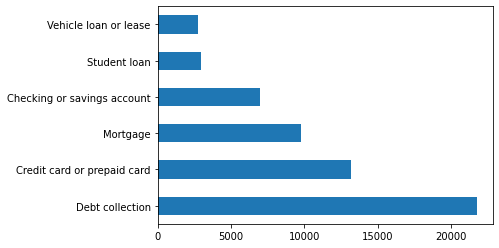

In [13]:
viz_col = input("Enter column you want plots for: ")
give_plots(viz_col)

In [14]:
give_counts('Company')

CITIBANK, N.A.                             3226
CAPITAL ONE FINANCIAL CORPORATION          2711
BANK OF AMERICA, NATIONAL ASSOCIATION      2580
JPMORGAN CHASE & CO.                       2409
WELLS FARGO & COMPANY                      2001
                                           ... 
Check Fraud Services                          1
Crescent City Credit Recovery, Inc.           1
Paragon Subrogation Services, Inc             1
MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC       1
Associated Collectors, Inc.                   1
Name: Company, Length: 2197, dtype: int64

For this project, we take only the Complaint Narrative, Product and Company and store it in complaints

In [15]:
complaints = text[['Consumer complaint narrative', 'Product', 'Company']].rename(columns = {'Consumer complaint narrative':'Complaint'})
complaints

,Complaint,Product,Company
0,This auto loan was opened on XX/XX/2020 in XXX...,Vehicle loan or lease,TRUIST FINANCIAL CORPORATION
1,In XXXX of 2019 I noticed a debt for {$620.00}...,Debt collection,CURO Intermediate Holdings
2,"As stated from Capital One, XXXX XX/XX/XXXX an...",Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION
3,"Please see CFPB case XXXX. \n\nCapital One, in...",Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION
4,This debt was incurred due to medical malpract...,Debt collection,"Merchants and Professional Bureau, Inc."
...,...,...,...
57448,I am attempting to make a payment toward my st...,Student loan,"Nelnet, Inc."
57449,Received letter for {$480.00}. Original credit...,Debt collection,"The Receivable Management Services LLC, New Yo..."
57450,entire time 10 years until XX/XX/2020. XXXX ma...,Debt collection,"Convergent Resources, Inc."
57451,I am a customer with Wells Fargo Bank. Recentl...,Checking or savings account,WELLS FARGO & COMPANY


Adjusting the column width to see the complaints column better

In [16]:
pd.set_option('max_colwidth', -1)
complaints

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Complaint,Product,Company
0,"This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account.",Vehicle loan or lease,TRUIST FINANCIAL CORPORATION
1,"In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, nothing came up in their system. I gave my social and the rep said the account popped up but DID NOT tell me that the account was under someone elses name and continued to let me make a payment. The payment was for {$120.00}. Confirmation number-XXXX. After realizing it was not my account, I called back to get my money back and inform them of the mistake. I was told i needed to mail them an FTC report and dispute letter to get my money back. I completed all of this and when i called again they said they transferred the account back to speedy cash for fraud review and I would need to contact them. After contacting them i was again told that i can not get my money back. The issue im having is this representative at XXXX XXXX played blind to obvious fraud and let an innocent person make a payment on someone elses debt and i want my money back.",Debt collection,CURO Intermediate Holdings
2,"As stated from Capital One, XXXX XX/XX/XXXX and XXXX 2018, My wife and I went to several car dealerships to request for a car loan to get a used car. However, according to their credit requirements unfortunately my credit score was insufficient for the car loan approval at that time. It seemed as though they pulled my credit report multiple times.",Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION
3,"Please see CFPB case XXXX. \n\nCapital One, in the letter they provided ( and attached to that case as their response ) said this : "" The funds were reversed and sent back to XXXX XXXX XXXX on XX/XX/XXXX ''. \n\nXXXX XXXX XXXX ( now XXXX XXXX ) has not received these funds. Staff at XXXX XXXX - and also staff at the account-holder 's business - have looked for return of my money ( {$650.00} ) and find nothing. \n\nCapital One needs to document - actually prove - they returned the funds, as stated in their letter. Capital One must provide electronic information, if the return was made that way, or document the paper check they sent back to XXXX XXXX. \n\nI've left 3 messages about this problem for the person who signed the letter ( XXXX ) from Capital One. I have received no call-backs. \n\nSummary : Capital One said they returned my money on XX/XX/XXXX : they did not. If they continue claim they did, then they need to prove that.",Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION
4,"This debt was incurred due to medical malpractice ( XXXX XXXX XXXX, XXXX, TX ). I asked the doctor to turn over my claim to his malpractice insurance company. This has cost me thousands of dollars to XXXX XXXX XXXX. I am still trying to collect damages from this doctor. He never responded and turned over me to collections Merchants and Professional Collection Bureau , Inc. I sent them a letter describing exactly this issue and instead of not contacting me and verifying my debt they start reporting this debt to the credit reporting agencies. They never verified the debt, like I asked and they never 

As our aim is to predict the Product (type of loan), we create a dictionary to code each Product type

In [17]:
target = {'Debt collection':0, 'Student loan': 1, 'Checking or savings account':2, 'Vehicle loan or lease':3, 'Mortgage':4, 'Credit card or prepaid card': 5}
target

{'Checking or savings account': 2,
 'Credit card or prepaid card': 5,
 'Debt collection': 0,
 'Mortgage': 4,
 'Student loan': 1,
 'Vehicle loan or lease': 3}

Using the map(dict) function we create a Target column to encode the Product type

In [18]:
complaints['target'] = complaints['Product'].map(target)
complaints

,Complaint,Product,Company,target
0,"This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account.",Vehicle loan or lease,TRUIST FINANCIAL CORPORATION,3
1,"In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, nothing came up in their system. I gave my social and the rep said the account popped up but DID NOT tell me that the account was under someone elses name and continued to let me make a payment. The payment was for {$120.00}. Confirmation number-XXXX. After realizing it was not my account, I called back to get my money back and inform them of the mistake. I was told i needed to mail them an FTC report and dispute letter to get my money back. I completed all of this and when i called again they said they transferred the account back to speedy cash for fraud review and I would need to contact them. After contacting them i was again told that i can not get my money back. The issue im having is this representative at XXXX XXXX played blind to obvious fraud and let an innocent person make a payment on someone elses debt and i want my money back.",Debt collection,CURO Intermediate Holdings,0
2,"As stated from Capital One, XXXX XX/XX/XXXX and XXXX 2018, My wife and I went to several car dealerships to request for a car loan to get a used car. However, according to their credit requirements unfortunately my credit score was insufficient for the car loan approval at that time. It seemed as though they pulled my credit report multiple times.",Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION,3
3,"Please see CFPB case XXXX. \n\nCapital One, in the letter they provided ( and attached to that case as their response ) said this : "" The funds were reversed and sent back to XXXX XXXX XXXX on XX/XX/XXXX ''. \n\nXXXX XXXX XXXX ( now XXXX XXXX ) has not received these funds. Staff at XXXX XXXX - and also staff at the account-holder 's business - have looked for return of my money ( {$650.00} ) and find nothing. \n\nCapital One needs to document - actually prove - they returned the funds, as stated in their letter. Capital One must provide electronic information, if the return was made that way, or document the paper check they sent back to XXXX XXXX. \n\nI've left 3 messages about this problem for the person who signed the letter ( XXXX ) from Capital One. I have received no call-backs. \n\nSummary : Capital One said they returned my money on XX/XX/XXXX : they did not. If they continue claim they did, then they need to prove that.",Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION,2
4,"This debt was incurred due to medical malpractice ( XXXX XXXX XXXX, XXXX, TX ). I asked the doctor to turn over my claim to his malpractice insurance company. This has cost me thousands of dollars to XXXX XXXX XXXX. I am still trying to collect damages from this doctor. He never responded and turned over me to collections Merchants and Professional Collection Bureau , Inc. I sent them a letter describing exactly this issue and instead of not contacting me and verifying my debt they start reporting this debt to the credit reporting agencies. They never verified the debt, like I asked 

Now, create the training and testing sets for the Feature variables

In [19]:
X_train, X_test = train_test_split(complaints, test_size = 0.2, random_state = 42)

We then use the SnowballStemmer to remove the morphological affixes from the texts. 

In [20]:
stemmer = nltk.stem.SnowballStemmer('english')

Using the stopwords feature of NLTK, we can remove the unnecessary words

In [21]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now, a function tokenize() is created to use the Stemmer and Stopwords feature on each word in our text field.

In [22]:
def tokenize(text):
  tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ]
  tokens = map(str.lower, tokens)
  stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
  return stems

Using the TfidVectorizer, we can transform the text to feature vectors. We assign our X_train['Complaint'] to this. 

In [23]:
tf_vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words = None, max_df = 0.75, ngram_range = (1,2), max_features = 1000, lowercase = False)
train_vectors = tf_vectorizer.fit_transform(X_train.Complaint)
train_vectors.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09276639],
       [0.        , 0.42401169, 0.        , ..., 0.        , 0.        ,
        0.        ]])

You can also check what feature names has the vectorizer given to our text

In [24]:
tf_vectorizer.get_feature_names()

['abil',
 'abl',
 'absolut',
 'abus',
 'accept',
 'access',
 'accord',
 'account',
 'account account',
 'account balanc',
 'account bank',
 'account call',
 'account close',
 'account credit',
 'account inform',
 'account number',
 'account open',
 'account report',
 'account would',
 'accru',
 'acct',
 'accur',
 'acknowledg',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'addit',
 'address',
 'adjust',
 'admit',
 'advanc',
 'advantag',
 'advertis',
 'advis',
 'affect',
 'affidavit',
 'afford',
 'agenc',
 'agent',
 'agre',
 'agreement',
 'alert',
 'alleg',
 'alleg debt',
 'alli',
 'allow',
 'almost',
 'along',
 'alreadi',
 'also',
 'although',
 'alway',
 'america',
 'american',
 'american express',
 'amount',
 'amount owe',
 'and/or',
 'annual',
 'anoth',
 'answer',
 'anyon',
 'anyth',
 'apart',
 'appar',
 'appeal',
 'appear',
 'appli',
 'applic',
 'apprais',
 'appreci',
 'approv',
 'approxim',
 'around',
 'arrang',
 'arriv',
 'ask',
 'assess',
 'assign',
 'assist',
 'associ',
 'assu

We also assign the TfidVectorizer to the Test set of the Complaints column

In [25]:
test_vectors = tf_vectorizer.transform(X_test.Complaint)

In [26]:
print(X_train.shape)
print(X_test.shape)

(45962, 4)
(11491, 4)


Using the vectorized values, we create a training dataframe and add our Target (dependent column) to this

In [27]:
train_df = pd.DataFrame(train_vectors.toarray(), columns = tf_vectorizer.get_feature_names())
train_df = pd.concat([train_df, X_train['target'].reset_index(drop = True)], axis= 1)
train_df

,abil,abl,absolut,abus,accept,access,accord,account,account account,account balanc,account bank,account call,account close,account credit,account inform,account number,account open,account report,account would,accru,acct,accur,acknowledg,act,action,activ,actual,ad,addit,address,adjust,admit,advanc,advantag,advertis,advis,affect,affidavit,afford,agenc,...,verifi,victim,victim ident,violat,visa,visit,voicemail,wait,waiv,want,wasnt,websit,week,week later,well,well fargo,went,whether,whole,wife,will,wire,withdraw,within,within day,without,word,work,would,would call,would like,would need,would receiv,would take,write,written,wrong,wrote,year,target
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.269101,0.0,0.000000,...,0.0,0.233564,0.262405,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.081046,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.12927,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.102029,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,2
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.091356,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,5
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.075525,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.032929,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,4
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.134970,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.442409,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45957,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029275,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.028254,0.020241,0.0,0.015921,0.0,0.0,0.017915,0.029008,0.306978,0.455488,0.017791,0.0,0.0,0.000000,0.0,0.0,0.0,0.019007,0.0,0.0,0.0,0.000000,0.159276,0.0,0.0,0.028821,0.0,0.0,0.02131,0.022308,0.0,0.0,0.014538,4
45958,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.159769,0.123222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.235121,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00

The plot for this Target will be the same as the Product plot we made in the very beginning

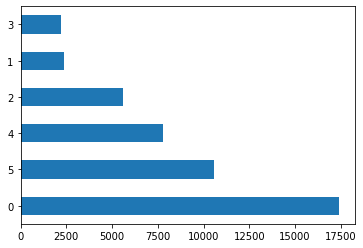

In [28]:
train_df['target'].value_counts().plot(kind = 'barh')

Similarly, also create a Testing dataframe with the Target column in it

In [29]:
test_df = pd.DataFrame(test_vectors.toarray(), columns = tf_vectorizer.get_feature_names())
test_df = pd.concat([test_df, X_test['target'].reset_index(drop = True)], axis= 1)
test_df

,abil,abl,absolut,abus,accept,access,accord,account,account account,account balanc,account bank,account call,account close,account credit,account inform,account number,account open,account report,account would,accru,acct,accur,acknowledg,act,action,activ,actual,ad,addit,address,adjust,admit,advanc,advantag,advertis,advis,affect,affidavit,afford,agenc,...,verifi,victim,victim ident,violat,visa,visit,voicemail,wait,waiv,want,wasnt,websit,week,week later,well,well fargo,went,whether,whole,wife,will,wire,withdraw,within,within day,without,word,work,would,would call,would like,would need,would receiv,would take,write,written,wrong,wrote,year,target
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.173101,0.0,0.0,0.0,0.036026,0.061675,0.0,0.037062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.213133,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.036079,0.0,0.0,0.020331,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.057932,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045924,0.000000,0.000000,0.030276,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.038689,4
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.053460,0.0,0.000000,0.0,0.0,0.000000,0.0,0.059737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.098077,0.000000,0.191003,0.0,0.0,0.290321,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,4
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269101,0.000000,0.000000,...,0.0,0.233564,0.262405,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11486,0.0,0.080013,0.0,0.0,0.000000,0.0,0.093716,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.050430,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.128889,0
11487,0.0,0.000000,0.0,0.0,0.078295,0.0,0.000000,0.032987,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.097058,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.058115,0.

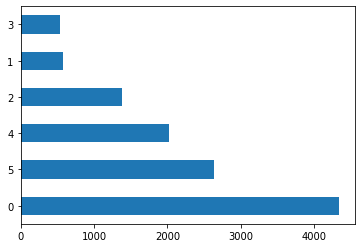

In [30]:
test_df['target'].value_counts().plot(kind = 'barh')

Now, convert the two dataframes we created to an H2O Frame. What this does is that it stores the data in a remote H2O cluster. 

In [31]:
h2o_train_df = h2o.H2OFrame(train_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Checking the types of words we have in our H2O frames

In [32]:
h2o_train_df.types

{'abil': 'real',
 'abl': 'real',
 'absolut': 'real',
 'abus': 'real',
 'accept': 'real',
 'access': 'real',
 'accord': 'real',
 'account': 'real',
 'account account': 'real',
 'account balanc': 'real',
 'account bank': 'real',
 'account call': 'real',
 'account close': 'real',
 'account credit': 'real',
 'account inform': 'real',
 'account number': 'real',
 'account open': 'real',
 'account report': 'real',
 'account would': 'real',
 'accru': 'real',
 'acct': 'real',
 'accur': 'real',
 'acknowledg': 'real',
 'act': 'real',
 'action': 'real',
 'activ': 'real',
 'actual': 'real',
 'ad': 'real',
 'addit': 'real',
 'address': 'real',
 'adjust': 'real',
 'admit': 'real',
 'advanc': 'real',
 'advantag': 'real',
 'advertis': 'real',
 'advis': 'real',
 'affect': 'real',
 'affidavit': 'real',
 'afford': 'real',
 'agenc': 'real',
 'agent': 'real',
 'agre': 'real',
 'agreement': 'real',
 'alert': 'real',
 'alleg': 'real',
 'alleg debt': 'real',
 'alli': 'real',
 'allow': 'real',
 'almost': 'real'

In [33]:
h2o_test_df.types

{'abil': 'real',
 'abl': 'real',
 'absolut': 'real',
 'abus': 'real',
 'accept': 'real',
 'access': 'real',
 'accord': 'real',
 'account': 'real',
 'account account': 'real',
 'account balanc': 'real',
 'account bank': 'real',
 'account call': 'real',
 'account close': 'real',
 'account credit': 'real',
 'account inform': 'real',
 'account number': 'real',
 'account open': 'real',
 'account report': 'real',
 'account would': 'real',
 'accru': 'real',
 'acct': 'real',
 'accur': 'real',
 'acknowledg': 'real',
 'act': 'real',
 'action': 'real',
 'activ': 'real',
 'actual': 'real',
 'ad': 'real',
 'addit': 'real',
 'address': 'real',
 'adjust': 'real',
 'admit': 'real',
 'advanc': 'real',
 'advantag': 'real',
 'advertis': 'real',
 'advis': 'real',
 'affect': 'real',
 'affidavit': 'real',
 'afford': 'real',
 'agenc': 'real',
 'agent': 'real',
 'agre': 'real',
 'agreement': 'real',
 'alert': 'real',
 'alleg': 'real',
 'alleg debt': 'real',
 'alli': 'real',
 'allow': 'real',
 'almost': 'real'

We convert the Target column in both the H2O frames to a Categorical value using the asfactor() function

In [34]:
h2o_train_df['target'] = h2o_train_df['target'].asfactor()
h2o_test_df['target'] = h2o_test_df['target'].asfactor()

In [35]:
h2o_train_df

abil abl absolut abus accept access accord account account account account balanc account bank account call account close account credit account inform account number account open account report account would accru acct accur acknowledg act action activ actual ad addit address adjust admit advanc advantag advertis advis affect affidavit afford agenc agent agre agreement alert alleg alleg debt alli allow almost along alreadi also although alway america american american express amount amount owe and/or annual anoth answer anyon anyth apart appar appeal appear appli applic apprais appreci approv approxim around arrang arriv ask assess assign assist associ assum assur attach attempt attempt collect attorney author auto autom automat avail avoid awar away back balanc bank bank account bank america bank statement banker bankruptci barclay base basic becam began begin behalf behind believ belong benefit best better bill block bonus borrow bought branch breach bring bureau bureaus busi busi day buyer calcul california call call back call bank call call call custom call number call spoke call told came cancel cant capit card card account card compani care case cash caus ceas cell center certain certif certifi certifi mail cfpb chang charg charg account charg credit charg interest charg late chase chase bank chat check check account citi citibank citizen civil claim clear client close close account code collect collect account collect agenc collect compani collect debt collect practic collector come comen commit communic compani compani call complain complaint complet compli comput concern condit conduct confirm confus connect consent consid consolid consum contact continu contract convers cooper copi corpor correct correspond cost could counti coupl cours court cover covid-19 creat credit credit account credit bureau credit bureaus credit card credit file credit limit credit report credit score credit union creditor current custom custom servic daili damag data date daughter day day late day later deal debit debit card debt debt belong debt collect debt collector debt valid decept decid decis declin deduct default defer delay delet delinqu deliv demand deni denial depart deposit dept despit detail determin didnt differ direct direct deposit disclos disclosur disconnect discov discuss disput disput charg disput debt document dollar done dont doubl drop e-mail earli earn educ effect effort either electron elig els email employ employe end enough enrol ensur enter entir erron error escal escrow escrow account especi estat estim even even though ever everi everi month everi time everyth evid exact except execut exist expect expens experi expir explain explan express extend extens extra extrem fact fail failur fair fair credit fair debt fals famili fargo father fault fax fcra fdcpa feder fedloan fee feel figur file file complaint file disput fill final financ financi find fine firm first first time fix follow forbear forc foreclosur forgiv form forward found four fraud fraud depart fraudul fraudul charg free freedom freedom mortgag friday friend frustrat full fulli fund furthermor futur garnish gave general generat get give given go gone good govern grant great group half hand handl happen harass hard hardship health hear heard held help high higher histori hold holder home homeown honor hope hospit hour hous howev hsbc hung husband idea ident ident theft identifi ignor illeg immedi impact import imposs inaccur includ incom incorrect increas incur indic individu info inform inform credit initi inquir inquiri insist inspect instead institut instruct insur insur compani intent interest interest charg interest rate intern invalid investig invoic involv issu item judgment keep kept kind knew know knowledg known lack ladi larg last last year late late fee late payment later law lawsuit lawyer learn leas least leav left legal legal action lend lender less letter letter date letter sent letter state licens lie lien life like limit line link list 

In [36]:
h2o_test_df

abil abl absolut abus accept access accord account account account account balanc account bank account call account close account credit account inform account number account open account report account would accru acct accur acknowledg act action activ actual ad addit address adjust admit advanc advantag advertis advis affect affidavit afford agenc agent agre agreement alert alleg alleg debt alli allow almost along alreadi also although alway america american american express amount amount owe and/or annual anoth answer anyon anyth apart appar appeal appear appli applic apprais appreci approv approxim around arrang arriv ask assess assign assist associ assum assur attach attempt attempt collect attorney author auto autom automat avail avoid awar away back balanc bank bank account bank america bank statement banker bankruptci barclay base basic becam began begin behalf behind believ belong benefit best better bill block bonus borrow bought branch breach bring bureau bureaus busi busi day buyer calcul california call call back call bank call call call custom call number call spoke call told came cancel cant capit card card account card compani care case cash caus ceas cell center certain certif certifi certifi mail cfpb chang charg charg account charg credit charg interest charg late chase chase bank chat check check account citi citibank citizen civil claim clear client close close account code collect collect account collect agenc collect compani collect debt collect practic collector come comen commit communic compani compani call complain complaint complet compli comput concern condit conduct confirm confus connect consent consid consolid consum contact continu contract convers cooper copi corpor correct correspond cost could counti coupl cours court cover covid-19 creat credit credit account credit bureau credit bureaus credit card credit file credit limit credit report credit score credit union creditor current custom custom servic daili damag data date daughter day day late day later deal debit debit card debt debt belong debt collect debt collector debt valid decept decid decis declin deduct default defer delay delet delinqu deliv demand deni denial depart deposit dept despit detail determin didnt differ direct direct deposit disclos disclosur disconnect discov discuss disput disput charg disput debt document dollar done dont doubl drop e-mail earli earn educ effect effort either electron elig els email employ employe end enough enrol ensur enter entir erron error escal escrow escrow account especi estat estim even even though ever everi everi month everi time everyth evid exact except execut exist expect expens experi expir explain explan express extend extens extra extrem fact fail failur fair fair credit fair debt fals famili fargo father fault fax fcra fdcpa feder fedloan fee feel figur file file complaint file disput fill final financ financi find fine firm first first time fix follow forbear forc foreclosur forgiv form forward found four fraud fraud depart fraudul fraudul charg free freedom freedom mortgag friday friend frustrat full fulli fund furthermor futur garnish gave general generat get give given go gone good govern grant great group half hand handl happen harass hard hardship health hear heard held help high higher histori hold holder home homeown honor hope hospit hour hous howev hsbc hung husband idea ident ident theft identifi ignor illeg immedi impact import imposs inaccur includ incom incorrect increas incur indic individu info inform inform credit initi inquir inquiri insist inspect instead institut instruct insur insur compani intent interest interest charg interest rate intern invalid investig invoic involv issu item judgment keep kept kind knew know knowledg known lack ladi larg last last year late late fee late payment later law lawsuit lawyer learn leas least leav left legal legal action lend lender less letter letter date letter sent letter state licens lie lien life like limit line link list 

Now, we initiate the H2OAutoML function and assign the required parameters. Since it takes a long time to compute, I have set the Max Runtime to 1 hour

In [37]:
aml = H2OAutoML(max_models=10, exclude_algos= ['StackedEnsemble'], seed=10, verbosity='info', nfolds= 0, balance_classes=True, max_after_balance_size=0.3, max_runtime_secs = 3600)

Assign x and y their respective values 

In [38]:
x = tf_vectorizer.get_feature_names()
y = 'target'

Now, we initialize the training for the AutoML model using x, y and the Training and Testing frames.

In [39]:
aml.train(x = x, y = y, training_frame= h2o_train_df, validation_frame= h2o_test_df)

AutoML progress: |
16:28:26.778: Project: AutoML_20210115_162826769
16:28:26.780: Cross-validation disabled by user: no fold column nor nfolds > 1.
16:28:26.781: Setting stopping tolerance adaptively based on the training frame: 0.00466445106034528
16:28:26.781: Build control seed: 10
16:28:26.781: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
16:28:33.134: training frame: Frame key: automl_training_py_1_sid_a2ee    cols: 1001    rows: 41262  chunks: 53    size: 34450822  checksum: -7800085253349978272
16:28:33.136: validation frame: Frame key: py_2_sid_a2ee    cols: 1001    rows: 11491  chunks: 14    size: 9574585  checksum: -7625182283542110680
16:28:33.453: leaderboard frame: Frame key: automl_leaderboard_py_1_sid_a2ee    cols: 1001    rows: 4700  chunks: 53    size: 7506996  checksum: 3797757144987734232
16:28:33.453: blending frame: NULL
16:28:33.453: response

Check the leaderboard to view the metrics for each model.

In [40]:
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
XGBoost_1_AutoML_20210115_162826,0.139716,0.322137,0.309387,0.0957205,nan,nan
XGBoost_3_AutoML_20210115_162826,0.147189,0.329521,0.312851,0.0978757,nan,nan
GLM_1_AutoML_20210115_162826,0.154582,0.354673,0.324725,0.105446,nan,nan
XGBoost_2_AutoML_20210115_162826,0.1592,0.369879,0.335525,0.112577,nan,nan
GBM_1_AutoML_20210115_162826,0.224094,0.563269,0.429235,0.184243,nan,nan
GBM_3_AutoML_20210115_162826,0.23344,0.59877,0.445246,0.198244,nan,nan
GBM_2_AutoML_20210115_162826,0.233933,0.58326,0.437936,0.191788,nan,nan
GBM_4_AutoML_20210115_162826,0.261608,0.652575,0.46939,0.220327,nan,nan
DRF_1_AutoML_20210115_162826,0.28239,0.577736,0.43655,0.190576,nan,nan
GBM_5_AutoML_20210115_162826,0.315805,0.705153,0.494165,0.244199,nan,nan


Using the best performance in the leaderboard, we predict the testing dataframe.

In [41]:
pred = aml.leader.predict(h2o_test_df)

xgboost prediction progress: |████████████████████████████████████████████| 100%


We then check its performance on the Testing set.

In [42]:
aml.leader.model_performance(h2o_test_df)


ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.10049545866629116
RMSE: 0.3170101870071231
LogLoss: 0.3344419231157658
Mean Per-Class Error: 0.16380933714340207
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,4046.0,37.0,40.0,39.0,53.0,130.0,0.068815,"299 / 4,345"
1,53.0,463.0,1.0,11.0,26.0,22.0,0.196181,113 / 576
2,39.0,3.0,1167.0,6.0,17.0,152.0,0.156792,"217 / 1,384"
3,97.0,7.0,8.0,345.0,29.0,51.0,0.357542,192 / 537
4,79.0,10.0,19.0,18.0,1853.0,37.0,0.080853,"163 / 2,016"
5,169.0,1.0,124.0,11.0,18.0,2310.0,0.122674,"323 / 2,633"
6,4483.0,521.0,1359.0,430.0,1996.0,2702.0,0.113741,"1,307 / 11,491"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.886259
1,2,0.962579
2,3,0.984597
3,4,0.993734
4,5,0.998173
5,6,1.000000


Now, create a frame for the models in the leaderboard and get the value for XGBoost model from that. 

In [43]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Check the XGBoost performance metrics for the Training and Validation data

In [44]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20210115_162826


Model Summary: 


,,number_of_trees
0,,56.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.04921417546042762
RMSE: 0.22184268178244604
LogLoss: 0.17168744208021988
Mean Per-Class Error: 0.06266193219513298
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,15098.0,41.0,62.0,48.0,99.0,268.0,0.033171,"518 / 15,616"
1,93.0,1979.0,2.0,10.0,20.0,51.0,0.081671,"176 / 2,155"
2,87.0,2.0,4804.0,5.0,8.0,138.0,0.047581,"240 / 5,044"
3,129.0,7.0,11.0,1722.0,33.0,83.0,0.132494,"263 / 1,985"
4,111.0,4.0,25.0,13.0,6749.0,61.0,0.030734,"214 / 6,963"
5,323.0,7.0,116.0,14.0,18.0,9021.0,0.050321,"478 / 9,499"
6,15841.0,2040.0,5020.0,1812.0,6927.0,9622.0,0.045781,"1,889 / 41,262"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.954219
1,2,0.988343
2,3,0.996219
3,4,0.998643
4,5,0.999733
5,6,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.10049545866629116
RMSE: 0.3170101870071231
LogLoss: 0.3344419231157658
Mean Per-Class Error: 0.16380933714340207
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,4046.0,37.0,40.0,39.0,53.0,130.0,0.068815,"299 / 4,345"
1,53.0,463.0,1.0,11.0,26.0,22.0,0.196181,113 / 576
2,39.0,3.0,1167.0,6.0,17.0,152.0,0.156792,"217 / 1,384"
3,97.0,7.0,8.0,345.0,29.0,51.0,0.357542,192 / 537
4,79.0,10.0,19.0,18.0,1853.0,37.0,0.080853,"163 / 2,016"
5,169.0,1.0,124.0,11.0,18.0,2310.0,0.122674,"323 / 2,633"
6,4483.0,521.0,1359.0,430.0,1996.0,2702.0,0.113741,"1,307 / 11,491"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.886259
1,2,0.962579
2,3,0.984597
3,4,0.993734
4,5,0.998173
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2021-01-15 16:28:34,0.465 sec,0.0,0.833333,1.791759,0.831249,NaN,NaN,0.833333,1.791759,0.824558,NaN,NaN
1,,2021-01-15 16:28:51,18.201 sec,5.0,0.459302,0.634141,0.122364,NaN,NaN,0.475115,0.672992,0.149595,NaN,NaN
2,,2021-01-15 16:29:02,28.914 sec,10.0,0.351720,0.407308,0.101837,NaN,NaN,0.384073,0.474421,0.135149,NaN,NaN
3,,2021-01-15 16:29:11,37.509 sec,15.0,0.311344,0.322926,0.089283,NaN,NaN,0.354823,0.408965,0.130189,NaN,NaN
4,,2021-01-15 16:29:18,45.089 sec,20.0,0.288575,0.279049,0.079540,NaN,NaN,0.340696,0.379234,0.124619,NaN,NaN
5,,2021-01-15 16:29:26,52.705 sec,25.0,0.272415,0.249827,0.071906,NaN,NaN,0.332491,0.362677,0.122183,NaN,NaN
6,,2021-01-15 16:29:35,1 min 1.553 sec,30.0,0.261262,0.230815,0.066478,NaN,NaN,0.327893,0.353837,0.119311,NaN,NaN
7,,2021-01-15 16:29:43,1 min 9.577 sec,35.0,0.251864,0.215905,0.061655,NaN,NaN,0.324040,0.346950,0.116439,NaN,NaN
8,,2021-01-15 16:29:49,1 min 16.199 sec,40.0,0.243341,0.202572,0.057438,NaN,NaN,0.321512,0.341975,0.115221,NaN,NaN
9,,2021-01-15 16:29:57,1 min 23.833 sec,45.0,0.236086,0.191639,0.054336,NaN,NaN,0.319885,0.338809,0.115917,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mortgag,17134.416016,1.000000,0.120575
1,debt,14786.813477,0.862989,0.104055
2,credit card,7171.503418,0.418544,0.050466
3,card,7110.430664,0.414979,0.050036
4,loan,6634.687012,0.387214,0.046688
5,collect,6435.613281,0.375596,0.045288
6,bank,6315.708984,0.368598,0.044444
7,payment,3495.209229,0.203988,0.024596
8,escrow,2849.299072,0.166291,0.020051
9,deposit,2514.853516,0.146772,0.017697



See the whole table with table.as_data_frame()


Converting the paramters of H2O XGBoost to normal XGBoost

In [45]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'num_class': 6,
  'objective': 'multi:softprob',
  'seed': 10,
  'silent': True,
  'subsample': 0.6,
  'updater': 'grow_gpu_hist'},
 10000)

In [46]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

Initiliaze the XGBoost classifier with required parameters

In [47]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, objective='multi:softprob', random_state=10, **{"updater": "grow_gpu"})

In [48]:
xgb_clf.fit(train_vectors, X_train['target'])

[16:47:34] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, updater='grow_gpu', verbosity=1)

Making Predictions

In [49]:
predictions = xgb_clf.predict(test_vectors)

Making the confusion matrix too see the classification 

In [50]:
cm = confusion_matrix(X_test['target'], predictions)
print(cm)

[[4003   40   45   38   59  160]
 [  77  434    1    8   27   29]
 [  82    1 1131    7   15  148]
 [ 111    8   11  324   22   61]
 [ 123    2   20   15 1817   39]
 [ 234    1  111   10   10 2267]]


View the Classification Report

In [51]:
print('classification_report :\n',classification_report(X_test['target'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4345
           1       0.89      0.75      0.82       576
           2       0.86      0.82      0.84      1384
           3       0.81      0.60      0.69       537
           4       0.93      0.90      0.92      2016
           5       0.84      0.86      0.85      2633

    accuracy                           0.87     11491
   macro avg       0.87      0.81      0.83     11491
weighted avg       0.87      0.87      0.87     11491



Checking the weights for each class

In [53]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(X_train['target']),
                                             X_train['target']))
class_weights

[0.4395669554905224,
 3.226762145464757,
 1.3632912143323248,
 3.483553130210702,
 0.9842391537110797,
 0.7254103535353535]

Creating another array of weights

In [54]:
weights = np.ones(X_train.shape[0], dtype = 'float')
weights

array([1., 1., 1., ..., 1., 1., 1.])

In [55]:
for i, val in enumerate(X_train['target']):
    weights[i] = class_weights[val]

In [56]:
weights

array([0.43956696, 1.36329121, 0.72541035, ..., 0.72541035, 0.43956696,
       0.98423915])

Now, we again initialize the XGBClassifier and give it these weights as the parameters

In [57]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, objective='multi:softprob', random_state=10, **{"updater": "grow_gpu"})

In [58]:
xgb_clf.fit(train_vectors, X_train['target'], sample_weight=weights)

[16:58:43] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, updater='grow_gpu', verbosity=1)

Checking the accuracy score

In [59]:
print("Accuracy score (test): {0:.3f}".format(xgb_clf.score(test_vectors, X_test['target'])))

Accuracy score (test): 0.854


In [62]:
predictions = xgb_clf.predict(test_vectors)

For these predictions, we can see the differences in the Confusion Matrix and the Classification Report

In [63]:
cm = confusion_matrix(X_test['target'], predictions)
print(cm)

[[3721   88  103  160   79  194]
 [  27  489    1   54    4    1]
 [  31    4 1204   25   12  108]
 [  47   29   13  424    9   15]
 [  46   52   29   79 1789   21]
 [ 143    4  184  105   15 2182]]


In [64]:
print('classification_report :\n',classification_report(X_test['target'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      4345
           1       0.73      0.85      0.79       576
           2       0.78      0.87      0.83      1384
           3       0.50      0.79      0.61       537
           4       0.94      0.89      0.91      2016
           5       0.87      0.83      0.85      2633

    accuracy                           0.85     11491
   macro avg       0.79      0.85      0.81     11491
weighted avg       0.87      0.85      0.86     11491

